# Exploratory Data Analysis: Loan Payments

The aim of this project is to conduct exploratory data analysis (EDA) on a database of loan payments for a financial institution.

The code block below initialises the SQL table we will be using to perform this analysis as a Pandas dataframe using the 'db_utils.py' script included in the root directory of this project.

In [1]:
import db_utils as dbu
import pandas as pd

credentials = dbu.load_yaml('credentials.yaml')
data = dbu.RDSDatabaseConnector(credentials)
data.start_sqlalchemy_engine()
df = data.get_data('loan_payments') # turning SQL table into a Pandas dataframe
pd.set_option('display.max_columns', 50) # SQL table has 43 columns, pandas shows default 9

In [2]:
# Raw dataframe info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54231 entries, 0 to 54230
Data columns (total 43 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           54231 non-null  int64  
 1   member_id                    54231 non-null  int64  
 2   loan_amount                  54231 non-null  int64  
 3   funded_amount                51224 non-null  float64
 4   funded_amount_inv            54231 non-null  float64
 5   term                         49459 non-null  object 
 6   int_rate                     49062 non-null  float64
 7   instalment                   54231 non-null  float64
 8   grade                        54231 non-null  object 
 9   sub_grade                    54231 non-null  object 
 10  employment_length            52113 non-null  object 
 11  home_ownership               54231 non-null  object 
 12  annual_inc                   54231 non-null  float64
 13  verification_sta

In [3]:
# Raw dataframe sample
df.head(10)

,id,member_id,loan_amount,funded_amount,funded_amount_inv,term,int_rate,instalment,grade,sub_grade,employment_length,home_ownership,annual_inc,verification_status,issue_date,loan_status,payment_plan,purpose,dti,delinq_2yrs,earliest_credit_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_accounts,total_accounts,out_prncp,out_prncp_inv,total_payment,total_payment_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_payment_date,last_payment_amount,next_payment_date,last_credit_pull_date,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type
0,38676116,41461848,8000,8000.0,8000.0,36 months,7.49,248.82,A,A4,5 years,MORTGAGE,46000.0,Not Verified,Jan-2021,Current,n,credit_card,19.54,2,Oct-1987,1,5.0,NaN,12,27,5529.70,5529.70,2982.51,2982.51,2470.30,512.21,0.0,0.0,0.0,Jan-2022,248.82,Feb-2022,Jan-2022,0.0,5.0,1,INDIVIDUAL
1,38656203,41440010,13200,13200.0,13200.0,36 months,6.99,407.52,A,A3,9 years,RENT,50000.0,Not Verified,Jan-2021,Current,n,credit_card,24.20,0,Sep-2001,0,NaN,NaN,15,31,9102.83,9102.83,4885.11,4885.11,4097.17,787.94,0.0,0.0,0.0,Jan-2022,407.52,Feb-2022,Jan-2022,0.0,NaN,1,INDIVIDUAL
2,38656154,41439961,16000,16000.0,16000.0,36 months,7.49,497.63,A,A4,8 years,MORTGAGE,73913.0,Source Verified,Jan-2021,Fully Paid,n,credit_card,16.92,0,Sep-1998,0,69.0,NaN,7,18,0.00,0.00,16824.54,16824.54,16000.00,824.54,0.0,0.0,0.0,Oct-2021,12850.16,None,Oct-2021,0.0,NaN,1,INDIVIDUAL
3,38656128,41439934,15000,15000.0,15000.0,36 months,14.31,514.93,C,C4,1 year,RENT,42000.0,Source Verified,Jan-2021,Fully Paid,n,debt_consolidation,35.52,0,Jun-2008,0,74.0,NaN,6,13,0.00,0.00,15947.47,15947.47,15000.00,947.47,0.0,0.0,0.0,Jun-2021,13899.67,None,Jun-2021,0.0,NaN,1,INDIVIDUAL
4,38656121,41439927,15000,15000.0,15000.0,36 months,6.03,456.54,A,A1,10+ years,MORTGAGE,145000.0,Verified,Jan-2021,Current,n,debt_consolidation,3.33,0,Apr-2002,1,37.0,NaN,23,50,10297.47,10297.47,5473.46,5473.46,4702.53,770.93,0.0,0.0,0.0,Jan-2022,456.54,Feb-2022,Jan-2022,0.0,NaN,1,INDIVIDUAL
5,38656111,41439917,2525,2525.0,2525.0,36 months,11.44,83.20,B,B4,< 1 year,OWN,32000.0,Source Verified,Jan-2021,Current,n,home_improvement,6.60,1,Mar-2011,0,8.0,NaN,3,4,1842.68,1842.68,913.60,913.60,682.32,231.28,0.0,0.0,0.0,Jan-2022,91.39,Feb-2022,Jan-2022,0.0,NaN,1,INDIVIDUAL
6,38656110,41439916,6675,6675.0,6675.0,None,21.99,254.89,E,E5,None,RENT,13536.0,Verified,Jan-2021,Fully Paid,n,debt_consolidation,16.13,0,Nov-2006,2,NaN,NaN,3,4,0.00,0.00,6963.53,6963.53,6675.00,288.53,0.0,0.0,0.0,Mar-2021,6724.95,None,Mar-2021,0.0,NaN,1,INDIVIDUAL
7,38656067,41439872,26500,26500.0,26200.0,None,19.99,701.95,E,E3,< 1 year,RENT,78000.0,Source Verified,Jan-2021,Charged Off,n,debt_consolidation,13.71,0,Mar-2001,0,43.0,NaN,10,37,0.00,0.00,4182.27,4134.92,1197.35,2984.92,0.0,0.0,0.0,Aug-2021,701.95,None,Jan-2022,0.0,43.0,1,INDIVIDUAL
8,38656063,41439868,10000,10000.0,10000.0,60 months,12.99,227.48,C,C2,< 1 year,RENT,50048.0,Source Verified,Jan-2021,Current,n,credit_card,20.67,0,Nov-2005,0,NaN,NaN,8,11,8480.91,8480.91,2722.54,2722.54,1519.09,1203.45,0.0,0.0,0.0,Jan-2022,227.48,Feb-2022,Jan-2022,0.0,NaN,1,INDIVIDUAL
9,38656052,41439857,10000,NaN,10000.0,36 months,8.19,314.25,A,A5,10+ years,MORTGAGE,103000.0,Not Verified,Jan-2021,Current,n,credit_card,15.95,0,Feb-2002,1,35.0,NaN,14,35,6934.63,6934.63,3766.45,3766.45,3065.37,701.08,0.0,0.0,0.0,Jan-2022,314.25,Feb-2022,Jan-2022,0.0,NaN,1,INDIVIDUAL


## Cleaning the data

In this step of the analysis, I'll be cleaning the data by inspecting each column and determining whether I should be changing the data types to better suit analysis, then looking over the columns that are missing data to decide whether or not to impute the missing data.

### Column inspection

In [4]:
# Initialising class to inspect dataframe
inspector = dbu.DataFrameInfo()

# Printing the shape of the data and null counts for each column
inspector.print_shape(df)
print('') # linebreak for readability
inspector.print_nulls(df)

Shape of the data in dataframe
Number of rows in dataframe: 54231
Number of columns in dataframe: 43

Percentage of nulls for each column in dataframe
id                              0.000000
member_id                       0.000000
loan_amount                     0.000000
funded_amount                   5.544799
funded_amount_inv               0.000000
term                            8.799395
int_rate                        9.531449
instalment                      0.000000
grade                           0.000000
sub_grade                       0.000000
employment_length               3.905515
home_ownership                  0.000000
annual_inc                      0.000000
verification_status             0.000000
issue_date                      0.000000
loan_status                     0.000000
payment_plan                    0.000000
purpose                         0.000000
dti                             0.000000
delinq_2yrs                     0.000000
earliest_credit_line         

### Columns for conversion


From the dataframe sample above, the columns listed below are non-numeric. I will be updating this list of columns with notes as I check each column to determine whether they fit as categories. I will also list the columns that contain date information where the dtype isn't fit for handling datetime data.
1. Potential categories
- term: category OK, null data present, probably better as int in case need to use in calculations later
- grade: category OK
- sub_grade: category OK
- employment_length: category OK, null data present
- home_ownership: category OK, 2 NONEs present, further investigation required
- verification_status: category OK
- loan_status: category OK
- payment_plan: category OK, but 99.9% of data is n, only 1 response y, potential unnecessary column
- purpose: category OK
- application_type: category OK, but unnecessary column since there is only 1 type of response
2. Dates
- issue_date: dt64
- earliest_credit_line: dt64
- last_payment_date: dt64
- next_payment_date: dt64
- last_credit_pull_date: dt64


In [5]:
# Listing value counts of each object column to determine viability as category
object_cols = [
    'term',
    'grade',
    'sub_grade',
    'employment_length',
    'home_ownership',
    'verification_status',
    'loan_status',
    'payment_plan',
    'purpose',
    'application_type'
]

for col in object_cols:
    print(col)
    inspector.value_count(df, col)
    print('')

term
Number of distinct values in term: 49459
Frequency of each unique value in term
36 months    35845
60 months    13614
None          4772
Name: count, dtype: int64

grade
Number of distinct values in grade: 54231
Frequency of each unique value in grade
B    16369
C    13600
A     9818
D     8157
E     4072
F     1694
G      521
Name: count, dtype: int64

sub_grade
Number of distinct values in sub_grade: 54231
Frequency of each unique value in sub_grade
B3    3641
B4    3542
B2    3241
C1    3018
B5    3016
C2    2962
B1    2929
C3    2794
A5    2789
A4    2645
C4    2512
C5    2314
D1    1838
D2    1809
A3    1752
D3    1647
D4    1509
A2    1481
D5    1354
A1    1151
E1     989
E2     985
E3     817
E4     658
E5     623
F1     486
F2     390
F3     326
F4     287
F5     205
G1     156
G2     133
G3      87
G4      74
G5      71
Name: count, dtype: int64

employment_length
Number of distinct values in employment_length: 52113
Frequency of each unique value in employment_length
10+

#### Anomalies following value counts

Shown below are the rows containing the NONE values from the 'home_ownership' column.

In [6]:
# Further investigation into 'NONE' anomaly in home_ownership column
nones = df.loc[df['home_ownership'] == 'NONE']
nones.head()

,id,member_id,loan_amount,funded_amount,funded_amount_inv,term,int_rate,instalment,grade,sub_grade,employment_length,home_ownership,annual_inc,verification_status,issue_date,loan_status,payment_plan,purpose,dti,delinq_2yrs,earliest_credit_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_accounts,total_accounts,out_prncp,out_prncp_inv,total_payment,total_payment_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_payment_date,last_payment_amount,next_payment_date,last_credit_pull_date,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type
53947,179929,179912,15000,15000.0,3455.522875,36 months,15.65,524.77,F,F3,6 years,NONE,72000.0,Not Verified,Dec-2013,Does not meet the credit policy. Status:Charge...,n,other,8.73,2,May-1996,3,17.0,0.0,7,26,0.0,0.0,1694.31,397.67,662.04,386.64,0.0,645.63,6.38,Feb-2014,524.77,Dec-2014,Jan-2015,0.0,NaN,1,INDIVIDUAL
54171,121535,121373,2800,2800.0,1625.000000,36 months,8.70,88.65,B,B1,< 1 year,NONE,120000.0,Not Verified,Aug-2013,Fully Paid,n,other,15.00,0,May-1999,1,NaN,NaN,6,8,0.0,0.0,3191.12,1851.97,2800.00,391.12,0.0,0.00,0.00,Sep-2016,89.80,None,Aug-2013,NaN,NaN,1,INDIVIDUAL


loan_data_dict.md does not give a list of the types of home ownership, so I was initially questioning whether NONE would represent homeless people or whether it was missing data. The annual income figures for the rows in question are far beyond 50,000 so I will assume that this is simply missing data.

#### Converting the columns

In [7]:
# Initialising converter class
converter = dbu.DataTransform()

# Converting categorical data columns from object to category data type
category_columns = ["grade", "sub_grade", "employment_length", "home_ownership", "verification_status", "loan_status", "payment_plan", "purpose", "application_type"]
converter.to_category(df, category_columns)

In [8]:
# Converting columns containing dates from object(month, year) to datetime64(yyyy-mm-dd) data type
date_columns = ["issue_date", "earliest_credit_line", "last_payment_date", "next_payment_date", "last_credit_pull_date"]
converter.to_datetime(df, date_columns)

The term column would suit a category but the data is in format "number + months", making it an ordinal category. Therefore, I think it makes more sense as an int data type for further analysis. In order to convert this to an int column, I'll be editing the strings and renaming the column to clarify the information the string already tells us: the numbers represent an amount of months.

In [9]:
# Renaming term column to prevent confusion later
df = df.rename(columns={"term": "term_in_months"})

# Removing "months" from each row
df["term_in_months"] = df["term_in_months"].str.replace(" months", "")

In [10]:
# Converting term column from object to int
term = ["term_in_months"]
converter.to_int(df, "term_in_months")

In [11]:
# Dataframe info post-conversion
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54231 entries, 0 to 54230
Data columns (total 43 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   id                           54231 non-null  int64         
 1   member_id                    54231 non-null  int64         
 2   loan_amount                  54231 non-null  int64         
 3   funded_amount                51224 non-null  float64       
 4   funded_amount_inv            54231 non-null  float64       
 5   term_in_months               49459 non-null  float64       
 6   int_rate                     49062 non-null  float64       
 7   instalment                   54231 non-null  float64       
 8   grade                        54231 non-null  category      
 9   sub_grade                    54231 non-null  category      
 10  employment_length            52113 non-null  category      
 11  home_ownership               54231 non-nu

In [12]:
# Dataframe sample post-conversion
df.head(10)

,id,member_id,loan_amount,funded_amount,funded_amount_inv,term_in_months,int_rate,instalment,grade,sub_grade,employment_length,home_ownership,annual_inc,verification_status,issue_date,loan_status,payment_plan,purpose,dti,delinq_2yrs,earliest_credit_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_accounts,total_accounts,out_prncp,out_prncp_inv,total_payment,total_payment_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_payment_date,last_payment_amount,next_payment_date,last_credit_pull_date,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type
0,38676116,41461848,8000,8000.0,8000.0,36.0,7.49,248.82,A,A4,5 years,MORTGAGE,46000.0,Not Verified,2021-01-01,Current,n,credit_card,19.54,2,1987-10-01,1,5.0,NaN,12,27,5529.70,5529.70,2982.51,2982.51,2470.30,512.21,0.0,0.0,0.0,2022-01-01,248.82,2022-02-01,2022-01-01,0.0,5.0,1,INDIVIDUAL
1,38656203,41440010,13200,13200.0,13200.0,36.0,6.99,407.52,A,A3,9 years,RENT,50000.0,Not Verified,2021-01-01,Current,n,credit_card,24.20,0,2001-09-01,0,NaN,NaN,15,31,9102.83,9102.83,4885.11,4885.11,4097.17,787.94,0.0,0.0,0.0,2022-01-01,407.52,2022-02-01,2022-01-01,0.0,NaN,1,INDIVIDUAL
2,38656154,41439961,16000,16000.0,16000.0,36.0,7.49,497.63,A,A4,8 years,MORTGAGE,73913.0,Source Verified,2021-01-01,Fully Paid,n,credit_card,16.92,0,1998-09-01,0,69.0,NaN,7,18,0.00,0.00,16824.54,16824.54,16000.00,824.54,0.0,0.0,0.0,2021-10-01,12850.16,NaT,2021-10-01,0.0,NaN,1,INDIVIDUAL
3,38656128,41439934,15000,15000.0,15000.0,36.0,14.31,514.93,C,C4,1 year,RENT,42000.0,Source Verified,2021-01-01,Fully Paid,n,debt_consolidation,35.52,0,2008-06-01,0,74.0,NaN,6,13,0.00,0.00,15947.47,15947.47,15000.00,947.47,0.0,0.0,0.0,2021-06-01,13899.67,NaT,2021-06-01,0.0,NaN,1,INDIVIDUAL
4,38656121,41439927,15000,15000.0,15000.0,36.0,6.03,456.54,A,A1,10+ years,MORTGAGE,145000.0,Verified,2021-01-01,Current,n,debt_consolidation,3.33,0,2002-04-01,1,37.0,NaN,23,50,10297.47,10297.47,5473.46,5473.46,4702.53,770.93,0.0,0.0,0.0,2022-01-01,456.54,2022-02-01,2022-01-01,0.0,NaN,1,INDIVIDUAL
5,38656111,41439917,2525,2525.0,2525.0,36.0,11.44,83.20,B,B4,< 1 year,OWN,32000.0,Source Verified,2021-01-01,Current,n,home_improvement,6.60,1,2011-03-01,0,8.0,NaN,3,4,1842.68,1842.68,913.60,913.60,682.32,231.28,0.0,0.0,0.0,2022-01-01,91.39,2022-02-01,2022-01-01,0.0,NaN,1,INDIVIDUAL
6,38656110,41439916,6675,6675.0,6675.0,NaN,21.99,254.89,E,E5,NaN,RENT,13536.0,Verified,2021-01-01,Fully Paid,n,debt_consolidation,16.13,0,2006-11-01,2,NaN,NaN,3,4,0.00,0.00,6963.53,6963.53,6675.00,288.53,0.0,0.0,0.0,2021-03-01,6724.95,NaT,2021-03-01,0.0,NaN,1,INDIVIDUAL
7,38656067,41439872,26500,26500.0,26200.0,NaN,19.99,701.95,E,E3,< 1 year,RENT,78000.0,Source Verified,2021-01-01,Charged Off,n,debt_consolidation,13.71,0,2001-03-01,0,43.0,NaN,10,37,0.00,0.00,4182.27,4134.92,1197.35,2984.92,0.0,0.0,0.0,2021-08-01,701.95,NaT,2022-01-01,0.0,43.0,1,INDIVIDUAL
8,38656063,41439868,10000,10000.0,10000.0,60.0,12.99,227.48,C,C2,< 1 year,RENT,50048.0,Source Verified,2021-01-01,Current,n,credit_card,20.67,0,2005-11-01,0,NaN,NaN,8,11,8480.91,8480.91,2722.54,2722.54,1519.09,1203.45,0.0,0.0,0.0,2022-01-01,227.48,2022-02-01,2022-01-01,0.0,NaN,1,INDIVIDUAL
9,38656052,41439857,10000,NaN,10000.0,36.0,8.19,314.25,A,A5,10+ years,MORTGAGE,103000.0,Not Verified,2021-01-01,Current,n,credit_card,15.95,0,2002-02-01,1,35.0,NaN,14,35,6934.63,6934.63,3766.45,3766.45,3065.37,701.08,0.0,0.0,0.0,2022-01-01,314.25,2022-02-01,2022-01-01,0.0,NaN,1,INDIVIDUAL


### Columns with null data 

In this section I'll be visualising the null data to refer back to when I'm deciding whether to impute or remove it.

An additional column with null data was identified through column inspection above: home_ownership contains 2 NONEs, which register as a value rather than a null. Therefore, this column won't show on the plots and statistics used below to visualise the null data.

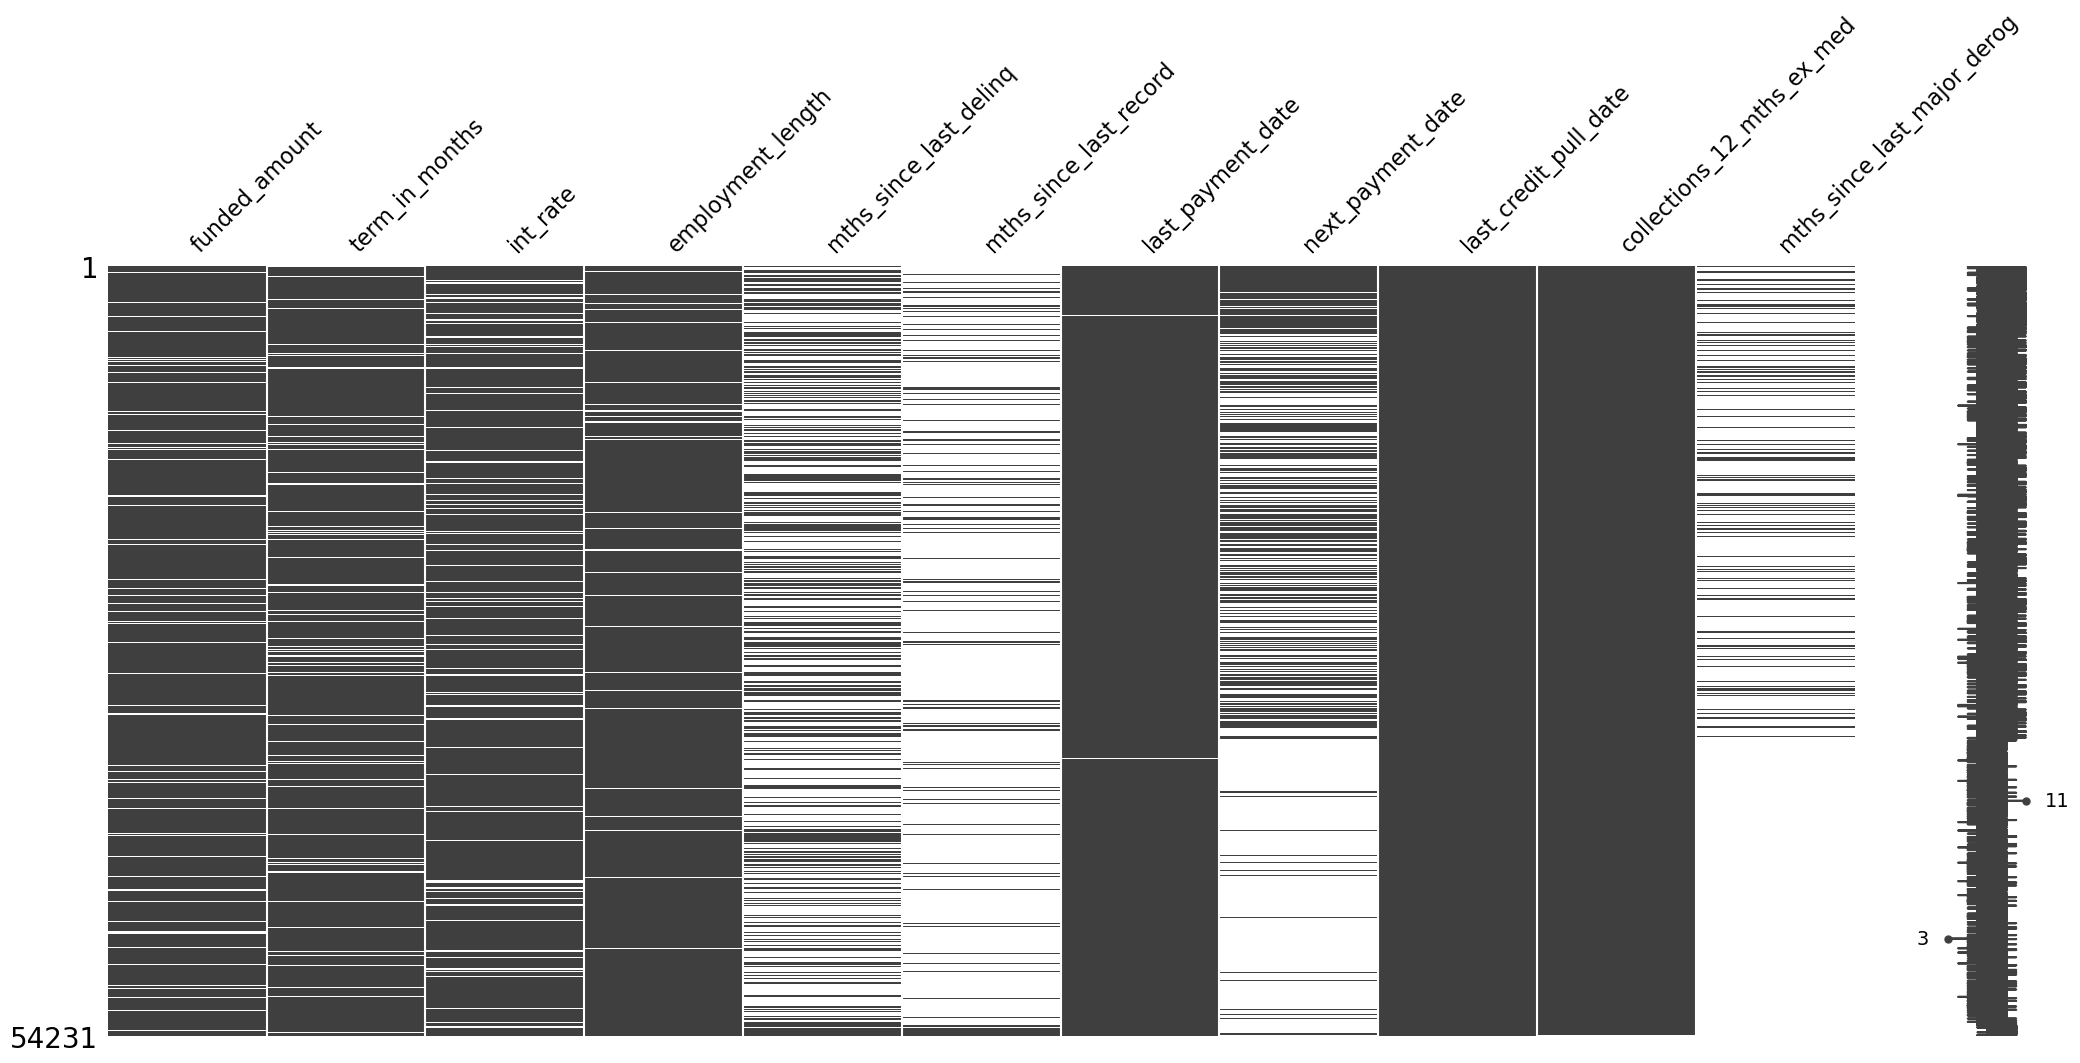

In [13]:
# Visualising columns with null data using Plotter class
import missingno as msno

plot = dbu.Plotter()

# Filtering data so that only columns with nulls are included in visualisation
data_filter = msno.nullity_filter(df, filter='bottom', p=0.9999, n=50)

plot.null_matrix(data_filter) # in the plot, null information is represented by white space

In [14]:
# Correlation heatmap of continuous data
import plotly.express as px

# Creating a copy of the dataframe with only continuous columns included for visualisation
cont_list = [
    'funded_amount', 
    'funded_amount_inv', 
    'int_rate', 
    'instalment', 
    'annual_inc', 
    'dti', 
    'open_accounts', 
    'total_accounts', 
    'out_prncp', 
    'out_prncp_inv', 
    'total_payment', 
    'total_payment_inv', 
    'total_rec_prncp', 
    'total_rec_int', 
    'total_rec_late_fee', 
    'recoveries', 
    'collection_recovery_fee', 
    'last_payment_amount'
    ]

cont_data = df.filter(cont_list)

# Plotting the filtered dataframe on a heatmap
heatmap = px.imshow(cont_data.corr(), width=1440, height=1080, text_auto=True)
heatmap.show()

In [15]:
null_cols = [
    'funded_amount', 
    'term_in_months', 
    'int_rate', 
    'employment_length', 
    'mths_since_last_delinq', 
    'mths_since_last_record', 
    'last_payment_date', 
    'next_payment_date', 
    'last_credit_pull_date', 
    'collections_12_mths_ex_med', 
    'mths_since_last_major_derog'
    ]

for col in null_cols:
    print(col)
    inspector.count_nulls(df, col)
    print(' ')

funded_amount
Percentage of non-null data in funded_amount: 94.455
Percentage of null data in funded_amount: 5.545
 
term_in_months
Percentage of non-null data in term_in_months: 91.201
Percentage of null data in term_in_months: 8.799
 
int_rate
Percentage of non-null data in int_rate: 90.469
Percentage of null data in int_rate: 9.531
 
employment_length
Percentage of non-null data in employment_length: 96.094
Percentage of null data in employment_length: 3.906
 
mths_since_last_delinq
Percentage of non-null data in mths_since_last_delinq: 42.833
Percentage of null data in mths_since_last_delinq: 57.167
 
mths_since_last_record
Percentage of non-null data in mths_since_last_record: 11.398
Percentage of null data in mths_since_last_record: 88.602
 
last_payment_date
Percentage of non-null data in last_payment_date: 99.865
Percentage of null data in last_payment_date: 0.135
 
next_payment_date
Percentage of non-null data in next_payment_date: 39.872
Percentage of null data in next_paymen

#### Null data investigation

In [16]:
# Value counts for null columns
for col in null_cols:
    inspector.value_count(df, col)
    print("") # line break for readability

Number of distinct values in funded_amount: 51224
Frequency of each unique value in funded_amount
10000.0    3703
NaN        3007
12000.0    2863
15000.0    2637
20000.0    2418
           ... 
19525.0       1
25300.0       1
27900.0       1
26125.0       1
24750.0       1
Name: count, Length: 1123, dtype: int64

Number of distinct values in term_in_months: 49459
Frequency of each unique value in term_in_months
36.0    35845
60.0    13614
NaN      4772
Name: count, dtype: int64

Number of distinct values in int_rate: 49062
Frequency of each unique value in int_rate
NaN      5169
11.99    1848
10.99    1842
12.99    1609
15.61    1158
         ... 
24.59       1
18.49       1
12.62       1
17.41       1
15.38       1
Name: count, Length: 458, dtype: int64

Number of distinct values in employment_length: 52113
Frequency of each unique value in employment_length
10+ years    15907
2 years       5066
< 1 year      5034
3 years       4589
5 years       3836
1 year        3708
4 years       

1. funded_amount: 5.545% of data is null.
    - Heatmap shows that this is 0.99 correlated with loan_amount, impute with that

2. term_in_months: 8.799% of data is null. 
    - Column only has two unique values as shown when investigating column as potential category. 36 months (mode) is a large amount of the data and column is ordinal-categorical, could impute with that.
    - Correlates somewhat with int_rate, strongest correlation (0.54) with total_rec_int.

3. int_rate: 9.531% of data is null.
    - 458 unique values in this column. Imputing with mean or median could work here, depending on outliers.
    - Correlates somewhat with term, strongest correlation (0.49) with total_rec_int.

4. employment_length: 3.906% of data is null.
    - 11 unique values in this column.
    - Highest frequency (mode) is 10+ years by a large margin and the column is ordinal-categorical. Could impute with this, could just front/backfill, could drop null rows as only 3% of data is null.

5. home_ownership: only two records with null data.
    - Probably best to just impute with "OTHER" as constant. Could impute with mode instead.

6. mths_since_last_delinq: 57.167% of data is null.
    - 101 unique values in this column.
    - loan_data_dict.md does not include a description of this column. Delinq seems to be shorthand for 30+ days past-due payments as described in the dict's entry for delinq_2yr.
    - Correlates highly with mths_since_last_major_derog (0.74), but both of these columns have high percentages of null data.

7. mths_since_last_record: 88.602% of data is null.
    - 121 unique values in this column.
    - Doesn't correlate well with any other column. Huge amount of missing data.

8. last_payment_date: 0.135% of data is null.
    - 99 unique values in this column.
    - Miniscule amount of null data. Potentially just drop rows, could impute with mode. If next_payment_date available for null row, could impute using next_payment_date -1 month.

9. next_payment_date: 60.128% of data is null.
    - 97 unique values in this column.
    - Large amount of missing data, also probably an irrelevant column due to future data being unusable for analysis.

10. last_credit_pull_date: 0.013% of data is null.
    - 102 unique values in this column.
    - Miniscule amount of null data. Potentially just drop rows, could impute with mode. Potentially front/backfill, loan company seems to pull credit on the first of a month.

11. collections_12_mths_ex_med: 0.094% of data is null.
    - 5 unique values in this column.
    - Miniscule amount of null data. Potentially just drop rows. Potentially just impute as 0.0 (mode) as that result has highest frequency.

12. mths_since_last_major_derog: 86.172% of data is null.
    - 114 unique values in this column.
    - Correlates highly with mths_since_last_delinq (0.74), but both of these columns have high percentages of null data.

    The "mths_since_last" columns with missing data are likely missing because there is no way to represent that those rows simply haven't missed a payment/had a public record on file. Could impute with the maximum term (60), or impute with a number higher than the maximum term (such as 99) as a constant. Alternatively, could drop columns since imputing more than 50% of a column would be unreliable for analysis.

### Columns to consider dropping
- application_type: unnecessary column since there is only 1 type of response.
- next_payment_date: all this tells us is that there is a payment due for the given row, and the date. Not actually useful for analysis.
- mths_since_last_delinq, mths_since_last_major_derog: over 50% missing data, only correlate with each other, since columns are a monthly count the missing data is likely just that these accounts have never had any kind of payment fault and so a constant might work, but could also introduce analysis problems.
- mths_since_last_record: similar issue to previous two columns except has no strong correlation to anything.

In [17]:
# Dropping unnecessary columns
df = df.drop(columns=["application_type", "next_payment_date", "mths_since_last_delinq", "mths_since_last_major_derog", "mths_since_last_record"])

In [18]:
# Dataframe sample with columns dropped
df.head(10)

,id,member_id,loan_amount,funded_amount,funded_amount_inv,term_in_months,int_rate,instalment,grade,sub_grade,employment_length,home_ownership,annual_inc,verification_status,issue_date,loan_status,payment_plan,purpose,dti,delinq_2yrs,earliest_credit_line,inq_last_6mths,open_accounts,total_accounts,out_prncp,out_prncp_inv,total_payment,total_payment_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_payment_date,last_payment_amount,last_credit_pull_date,collections_12_mths_ex_med,policy_code
0,38676116,41461848,8000,8000.0,8000.0,36.0,7.49,248.82,A,A4,5 years,MORTGAGE,46000.0,Not Verified,2021-01-01,Current,n,credit_card,19.54,2,1987-10-01,1,12,27,5529.70,5529.70,2982.51,2982.51,2470.30,512.21,0.0,0.0,0.0,2022-01-01,248.82,2022-01-01,0.0,1
1,38656203,41440010,13200,13200.0,13200.0,36.0,6.99,407.52,A,A3,9 years,RENT,50000.0,Not Verified,2021-01-01,Current,n,credit_card,24.20,0,2001-09-01,0,15,31,9102.83,9102.83,4885.11,4885.11,4097.17,787.94,0.0,0.0,0.0,2022-01-01,407.52,2022-01-01,0.0,1
2,38656154,41439961,16000,16000.0,16000.0,36.0,7.49,497.63,A,A4,8 years,MORTGAGE,73913.0,Source Verified,2021-01-01,Fully Paid,n,credit_card,16.92,0,1998-09-01,0,7,18,0.00,0.00,16824.54,16824.54,16000.00,824.54,0.0,0.0,0.0,2021-10-01,12850.16,2021-10-01,0.0,1
3,38656128,41439934,15000,15000.0,15000.0,36.0,14.31,514.93,C,C4,1 year,RENT,42000.0,Source Verified,2021-01-01,Fully Paid,n,debt_consolidation,35.52,0,2008-06-01,0,6,13,0.00,0.00,15947.47,15947.47,15000.00,947.47,0.0,0.0,0.0,2021-06-01,13899.67,2021-06-01,0.0,1
4,38656121,41439927,15000,15000.0,15000.0,36.0,6.03,456.54,A,A1,10+ years,MORTGAGE,145000.0,Verified,2021-01-01,Current,n,debt_consolidation,3.33,0,2002-04-01,1,23,50,10297.47,10297.47,5473.46,5473.46,4702.53,770.93,0.0,0.0,0.0,2022-01-01,456.54,2022-01-01,0.0,1
5,38656111,41439917,2525,2525.0,2525.0,36.0,11.44,83.20,B,B4,< 1 year,OWN,32000.0,Source Verified,2021-01-01,Current,n,home_improvement,6.60,1,2011-03-01,0,3,4,1842.68,1842.68,913.60,913.60,682.32,231.28,0.0,0.0,0.0,2022-01-01,91.39,2022-01-01,0.0,1
6,38656110,41439916,6675,6675.0,6675.0,NaN,21.99,254.89,E,E5,NaN,RENT,13536.0,Verified,2021-01-01,Fully Paid,n,debt_consolidation,16.13,0,2006-11-01,2,3,4,0.00,0.00,6963.53,6963.53,6675.00,288.53,0.0,0.0,0.0,2021-03-01,6724.95,2021-03-01,0.0,1
7,38656067,41439872,26500,26500.0,26200.0,NaN,19.99,701.95,E,E3,< 1 year,RENT,78000.0,Source Verified,2021-01-01,Charged Off,n,debt_consolidation,13.71,0,2001-03-01,0,10,37,0.00,0.00,4182.27,4134.92,1197.35,2984.92,0.0,0.0,0.0,2021-08-01,701.95,2022-01-01,0.0,1
8,38656063,41439868,10000,10000.0,10000.0,60.0,12.99,227.48,C,C2,< 1 year,RENT,50048.0,Source Verified,2021-01-01,Current,n,credit_card,20.67,0,2005-11-01,0,8,11,8480.91,8480.91,2722.54,2722.54,1519.09,1203.45,0.0,0.0,0.0,2022-01-01,227.48,2022-01-01,0.0,1
9,38656052,41439857,10000,NaN,10000.0,36.0,8.19,314.25,A,A5,10+ years,MORTGAGE,103000.0,Not Verified,2021-01-01,Current,n,credit_card,15.95,0,2002-02-01,1,14,35,6934.63,6934.63,3766.45,3766.45,3065.37,701.08,0.0,0.0,0.0,2022-01-01,314.25,2022-01-01,0.0,1


### Imputation

In [19]:
# Initialising class to perform imputation
transform = dbu.DataFrameTransform()

In [20]:
# Checking mean and median of int_rate
inspector.check_stats(df, "int_rate")

Q1 of int_rate: 10.37
Median of int_rate: 13.16
Q3 of int_rate: 16.2
Mean of int_rate: 13.507328482328484
Mode of int_rate: 11.99
Standard Deviation of int_rate: 4.392892583652351
Smallest value in int_rate: 5.42
Largest value in int_rate: 26.06


1. For the funded_amount column, I'll be using the values from loan_amount to impute the null values as these columns are collinear.
2. For home_ownership (a non-ordinal categorical column), term, employment_length (the ordinal categorical columns), last_payment_date, last_credit_pull_date and collections_12_mths_ex_med (the datetime columns), I'll be imputing with mode since mode is ideal for categorical data and the modes are dominant in the date columns with nulls.
3. After checking the stats of int_rate, I was going to use a box plot to determine what kind of effect any outliers might have, but the median and mean are almost exactly the same so there doesn't seem to be a clear winner here on which to use. I'll use the mean.

In [21]:
# Class method used to fill null values from another column
funded_amount = transform.impute_from_col(df, "funded_amount", "loan_amount")

In [22]:
# Class method used to impute null values with the column's mean
int_rate = transform.impute_mean(df, "int_rate")

In [23]:
# Class methods used to impute null values with columns' modes
transform.impute_mode(df, "term_in_months")
transform.impute_mode(df, "employment_length")
transform.impute_mode(df, "last_payment_date")
transform.impute_mode(df, "last_credit_pull_date")
transform.impute_mode(df, "collections_12_mths_ex_med")

The home_ownership column is filled with string data, therefore nulls will not be detected. Through the investigation above, it was revealed that there are two "null" entries where the row is filled with "NONE". I will manually fill these with the highest frequency value, "MORTGAGE".

In [24]:
# Replacing "NONE" entries in home_ownership
df["home_ownership"] = df["home_ownership"].str.replace("NONE", "MORTGAGE")

# Value count of home_ownership column after change
inspector.value_count(df, "home_ownership")

Number of distinct values in home_ownership: 54231
Frequency of each unique value in home_ownership
MORTGAGE    26925
RENT        22493
OWN          4750
OTHER          63
Name: count, dtype: int64


Percentage of nulls for each column in dataframe
id                            0.0
member_id                     0.0
loan_amount                   0.0
funded_amount                 0.0
funded_amount_inv             0.0
term_in_months                0.0
int_rate                      0.0
instalment                    0.0
grade                         0.0
sub_grade                     0.0
employment_length             0.0
home_ownership                0.0
annual_inc                    0.0
verification_status           0.0
issue_date                    0.0
loan_status                   0.0
payment_plan                  0.0
purpose                       0.0
dti                           0.0
delinq_2yrs                   0.0
earliest_credit_line          0.0
inq_last_6mths                0.0
open_accounts                 0.0
total_accounts                0.0
out_prncp                     0.0
out_prncp_inv                 0.0
total_payment                 0.0
total_payment_inv             0.0

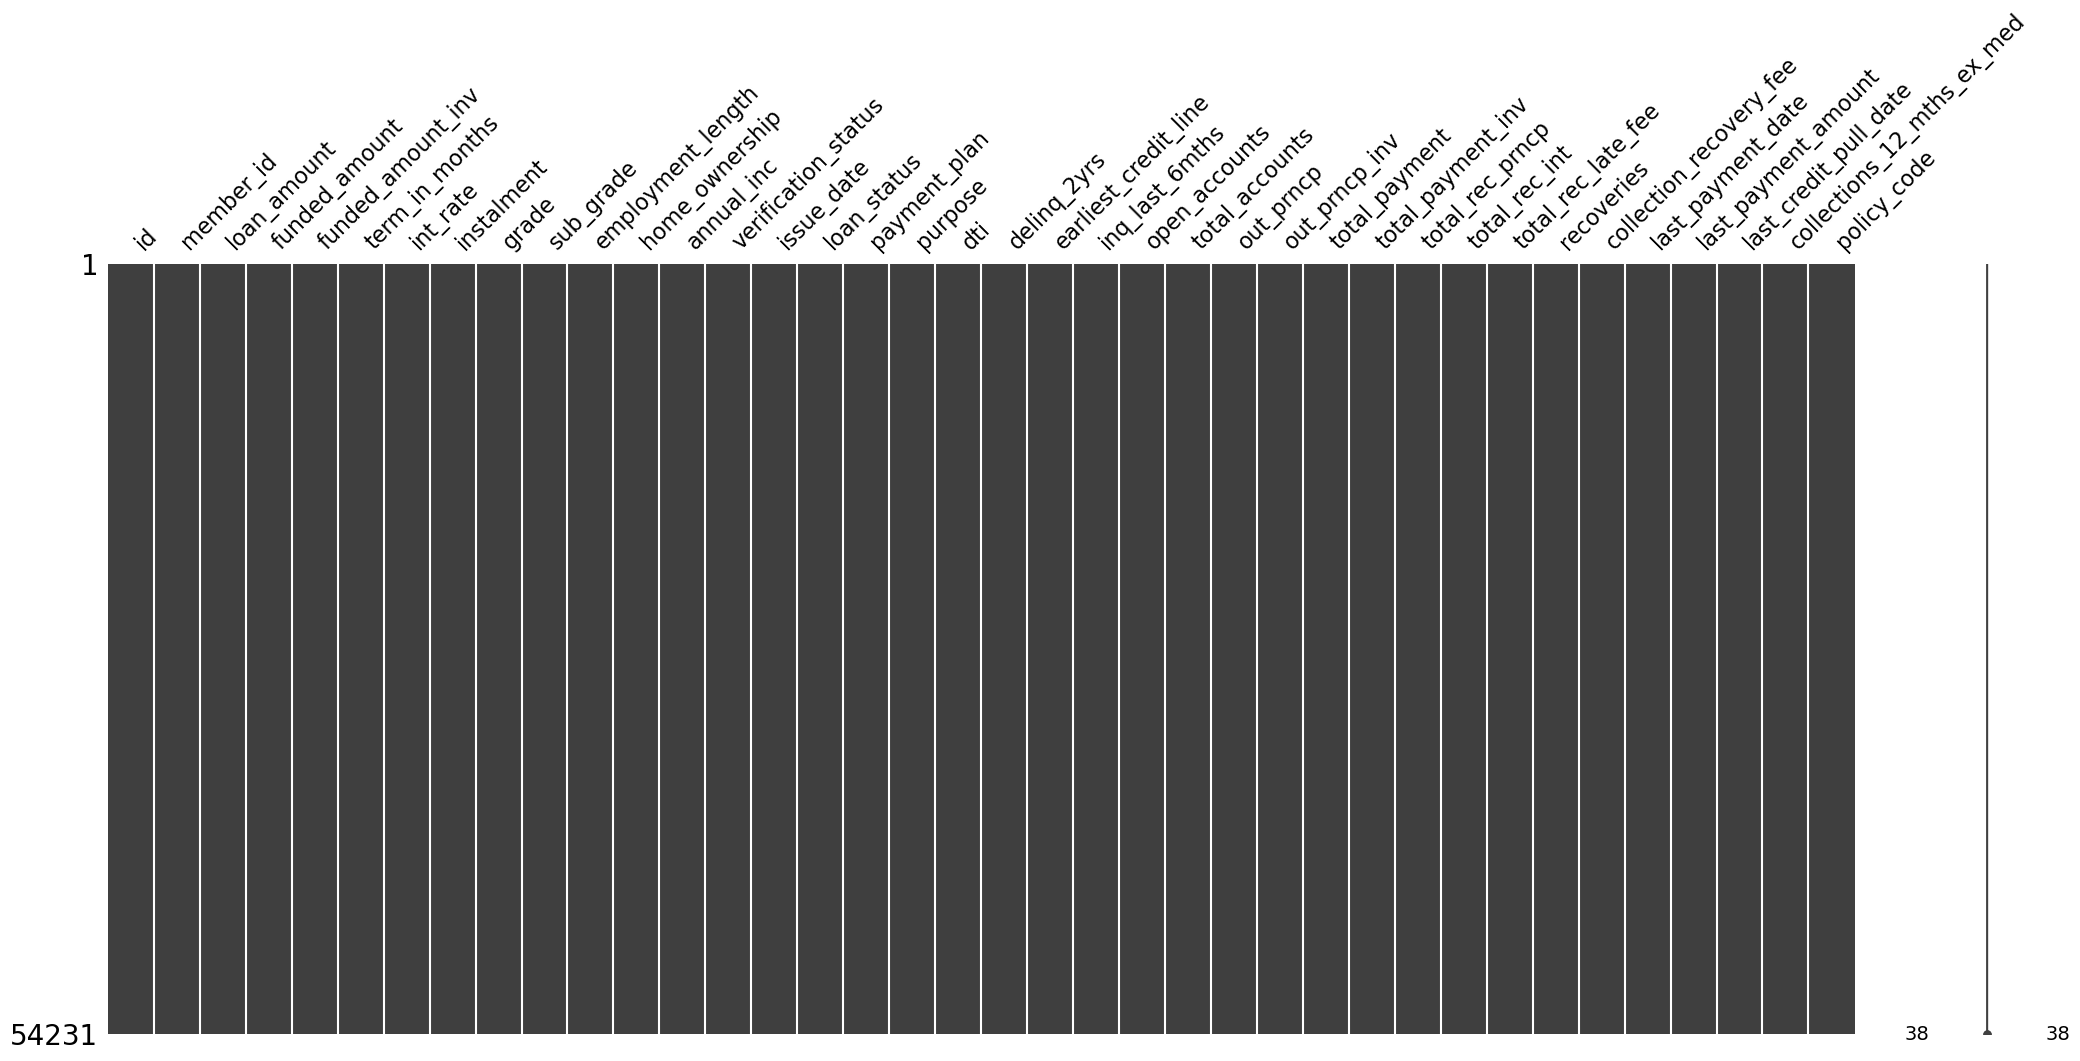

In [25]:
# Checking dataframe for nulls post-imputation and post-dropping
inspector.print_nulls(df)

# Visualisation of nulls post-imputation and post-dropping
plot.null_matrix(df)

# Backing up the cleaned dataframe 
clean_df = df

## Finding and Correcting Skewed Data

In [26]:
df.skew(numeric_only=True)

id                             2.370336
member_id                      2.205422
loan_amount                    0.805259
funded_amount                  0.820668
funded_amount_inv              0.813927
term_in_months                 1.148358
int_rate                       0.433193
instalment                     0.996981
annual_inc                     8.711831
dti                            0.189420
delinq_2yrs                    5.370002
inq_last_6mths                 3.248918
open_accounts                  1.059282
total_accounts                 0.779014
out_prncp                      2.356426
out_prncp_inv                  2.356848
total_payment                  1.267891
total_payment_inv              1.256197
total_rec_prncp                1.261015
total_rec_int                  2.204322
total_rec_late_fee            13.184305
recoveries                    14.589793
collection_recovery_fee       27.636843
last_payment_amount            2.499381
collections_12_mths_ex_med    20.262376


Checking the skew across the dataframe, there are no examples of negative skew so I'll be using a normalisation threshold of 0-1 to determine skew. Therefore, the skewed columns are:
1. term_in_months (1.148)
2. annual_inc (8.712)
3. delinq_2yrs (5.370)
4. inq_last_6mths (3.249)
5. open_accounts (1.059)
6. out_prncp (2.356)
7. out_prncp_inv (2.357)
8. total_payment (1.268)
9. total_payment_inv (1.256)
10. total_rec_prncp (1.261)
11. total_rec_int (2.204)
12. total_rec_late_fee (13.184)
13. recoveries (14.590)
14. collection_recovery_fee (27.637)
15. last_payment_amount (2.499)
16. collections_12_mths_ex_med (20.262)

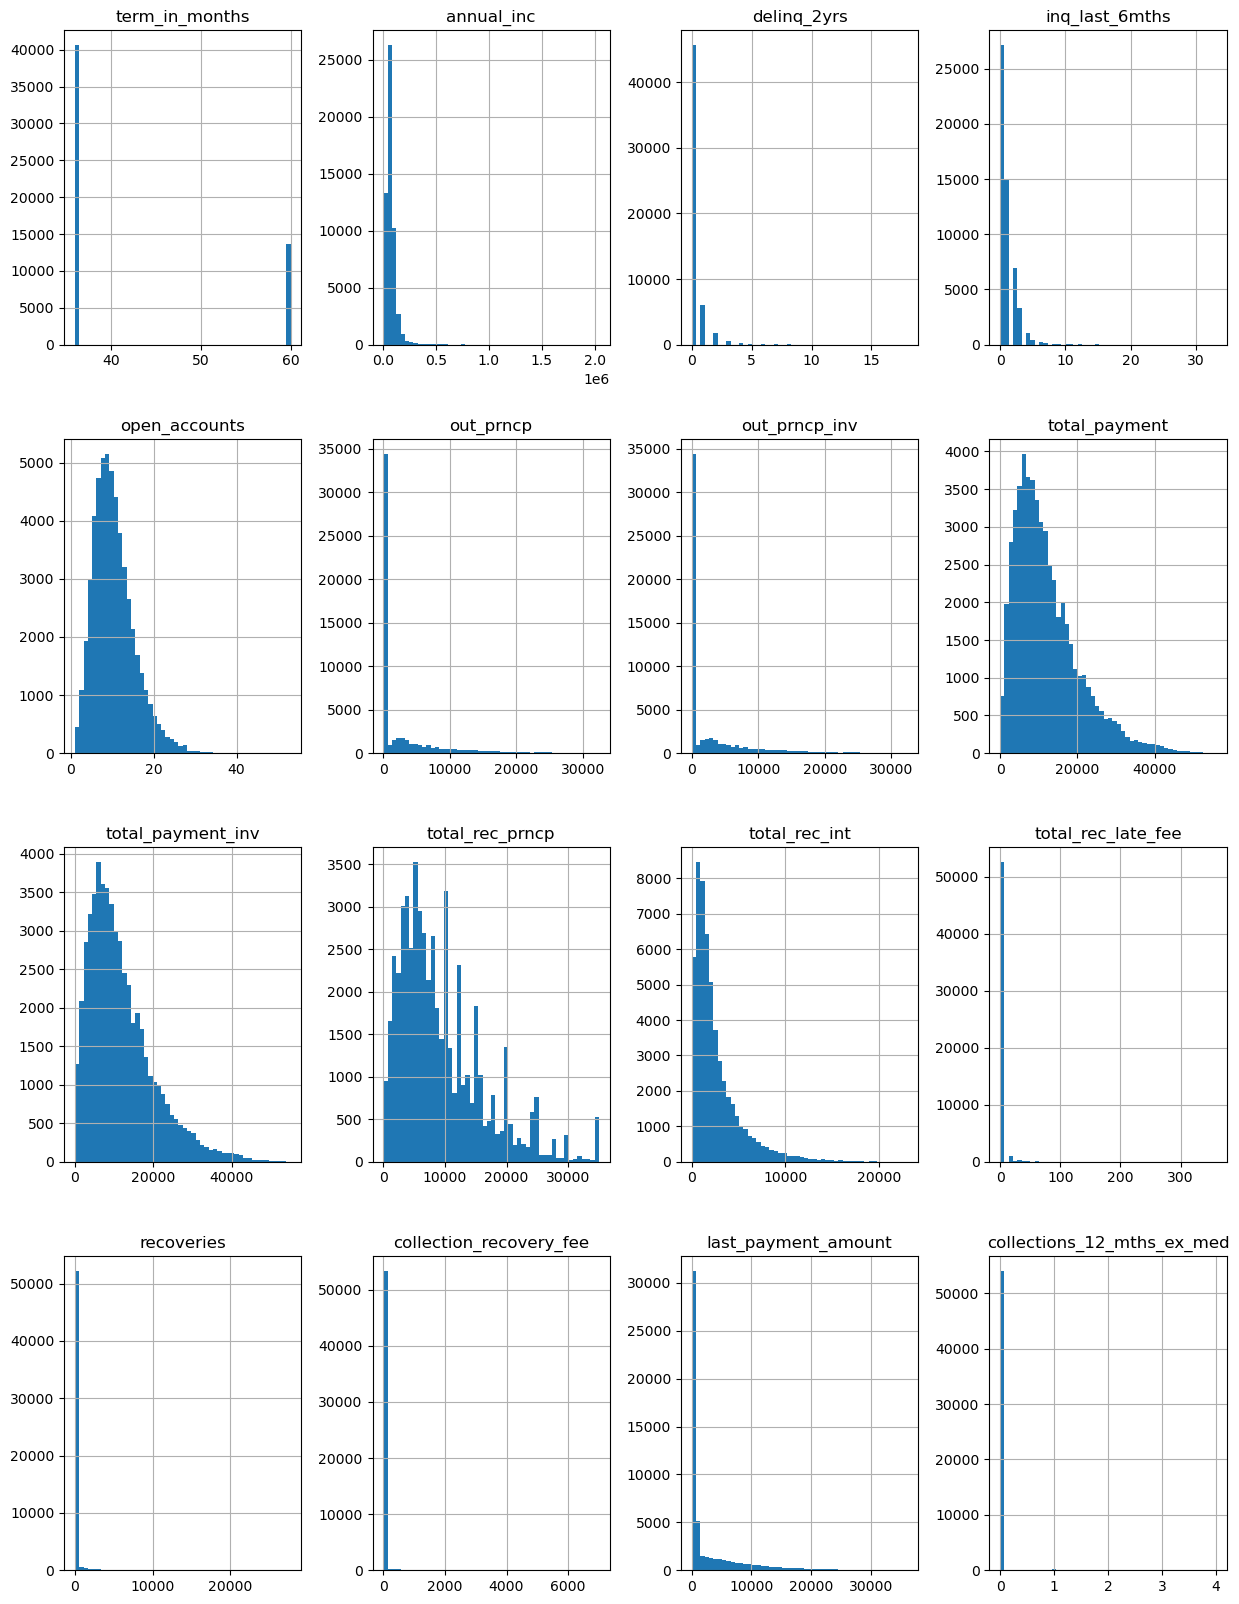

In [27]:
# Histogram of every skewed column identified
skew_cols = ["term_in_months", "annual_inc", "delinq_2yrs", "inq_last_6mths", "open_accounts", "out_prncp", "out_prncp_inv", "total_payment", "total_payment_inv", "total_rec_prncp", "total_rec_int", "total_rec_late_fee", "recoveries", "collection_recovery_fee", "last_payment_amount", "collections_12_mths_ex_med"]
plot.multi_hist(df, skew_cols)

Q1 of annual_inc: 45000.0
Median of annual_inc: 61000.0
Q3 of annual_inc: 86000.0
Mean of annual_inc: 72220.84824897199
Mode of annual_inc: 60000.0
Standard Deviation of annual_inc: 51589.33957740052
Smallest value in annual_inc: 3300.0
Largest value in annual_inc: 2039784.0


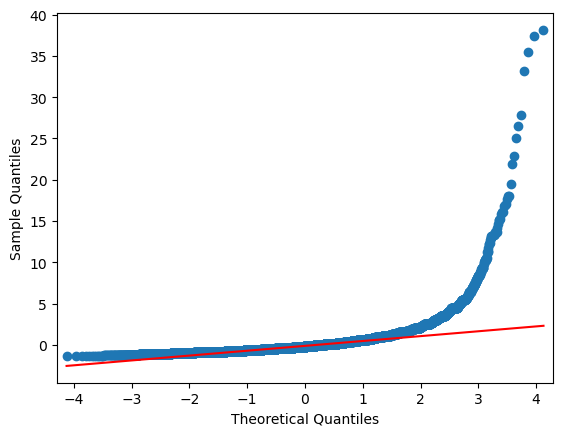

In [28]:
# Q-Q plot to analyse specific columns
inspector.check_stats(df, "annual_inc")
plot.plot_qq(df, "annual_inc")

In [29]:
# Interactive histogram to analyse specific columns
inspector.check_stats(df, "annual_inc")
plot.plot_hist(df, "annual_inc") # amount of bins is automatic depending on column

Q1 of annual_inc: 45000.0
Median of annual_inc: 61000.0
Q3 of annual_inc: 86000.0
Mean of annual_inc: 72220.84824897199
Mode of annual_inc: 60000.0
Standard Deviation of annual_inc: 51589.33957740052
Smallest value in annual_inc: 3300.0
Largest value in annual_inc: 2039784.0
